# **Cleaning and Preprocessing the data**

In [85]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import copy
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler

# Read the CSV file into a DataFrame
data = pd.read_csv('/content/drive/MyDrive/JPMorgan_data [MConverter.eu].csv')
# Remove duplicate rows from the DataFrame
data =  data.drop_duplicates()
# Drop rows with missing values from the DataFrame
data = data.dropna()

In [86]:
# Seperating our signals(X) and price(y)
Xcols = data.columns[data.columns.str.contains("High")| data.columns.str.contains("Low")|data.columns.str.contains("Close")|data.columns.str.contains("Adj")|data.columns.str.contains("Volume")]
X = data[Xcols]
X


,High,Low,Close,Adj Close,Volume
0,50.250000,48.083332,48.583332,24.406229,12019200
1,47.458332,46.125000,47.250000,23.870722,11723400
2,48.375000,46.000000,46.958332,23.723370,8714550
3,48.625000,46.500000,47.625000,24.060169,8369250
4,49.000000,47.333332,48.500000,24.502222,6571950
...,...,...,...,...,...
5530,159.119995,157.210007,157.259995,150.152054,8055200
5531,158.199997,156.339996,158.160004,151.011383,6188100
5532,160.149994,158.080002,158.639999,151.469666,6342300
5533,159.630005,158.149994,158.559998,151.393280,6398900


In [87]:
y = data['Open']
y

0        49.833332
1        47.083332
2        46.833332
3        46.750000
4        48.416668
           ...    
5530    157.610001
5531    157.600006
5532    158.199997
5533    158.850006
5534    159.110001
Name: Open, Length: 5535, dtype: float64

In [88]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Identifying and Quantifying**





High         0.999765
Low          0.999752
Close        0.999559
Adj Close    0.993736
Volume      -0.238539
dtype: float64


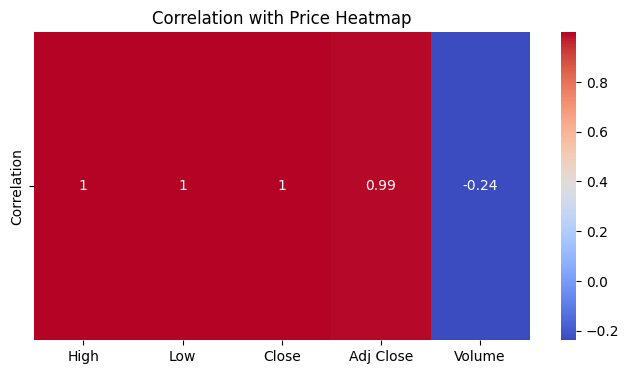

In [89]:
# Calculate the correlation between each signal and the price
correlation_with_Open = X.iloc[:, :].corrwith(data['Open'])

# Sort the correlation values in descending order
correlation_with_Open = correlation_with_Open.sort_values(ascending=False)

# Display the correlation values
print(correlation_with_Open)

# Reshape correlation values into a DataFrame for heatmap
correlation_X = pd.DataFrame(correlation_with_Open, columns=['Correlation'])
correlation_X = correlation_X.transpose()

# Create a heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_X, cmap='coolwarm', annot=True, cbar=True)
plt.title('Correlation with Price Heatmap')
plt.show()

If you observe the heatmap Signal3 and Signal4 are negatively correlated &
Signal1, Signal2, Signal5, Signal6, Signal7 are positively corelated with the price.

# **Utilization of Feauters**

## **Addition of Features**

In [90]:
# Addition of Features to immprove the Model

new_data = data.copy()

In [91]:
# Defining new features
def make_new_feature(data, cols, powers, new_col_name):
    data[new_col_name] = 1
    for power, col  in zip(powers, cols):
        data[new_col_name] = np.cos(data[new_col_name]) * np.sin((data[Xcols[col]]) ** power)

    return data

def make_new_feature1(data, cols, powers, new_col_name):
    data[new_col_name] = 1
    for power, col  in zip(powers, cols):
        data[new_col_name] = (data[new_col_name]) * np.sin((data[Xcols[col]]) ** power)

    return data




In [92]:
# New features


In [93]:
# New data set formed after addition of new features
Xcols = new_data.columns[new_data.columns.str.contains("C.")|new_data.columns.str.contains("H")|new_data.columns.str.contains("V")|new_data.columns.str.contains("L")]
X = new_data[Xcols]
X

,High,Low,Close,Adj Close,Volume
0,50.250000,48.083332,48.583332,24.406229,12019200
1,47.458332,46.125000,47.250000,23.870722,11723400
2,48.375000,46.000000,46.958332,23.723370,8714550
3,48.625000,46.500000,47.625000,24.060169,8369250
4,49.000000,47.333332,48.500000,24.502222,6571950
...,...,...,...,...,...
5530,159.119995,157.210007,157.259995,150.152054,8055200
5531,158.199997,156.339996,158.160004,151.011383,6188100
5532,160.149994,158.080002,158.639999,151.469666,6342300
5533,159.630005,158.149994,158.559998,151.393280,6398900


## **Linear Regresson**

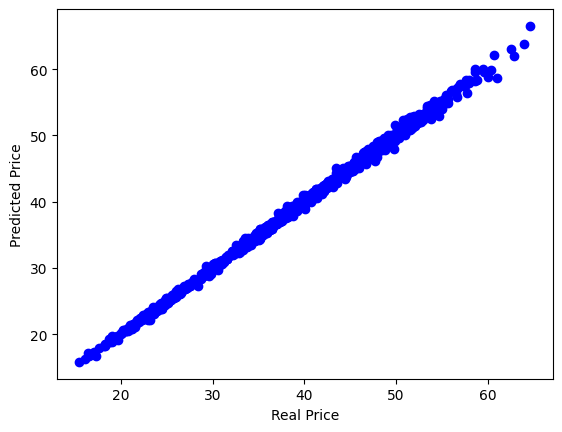

Root mean squared error: 0.42
Coefficient of determination: 1.00


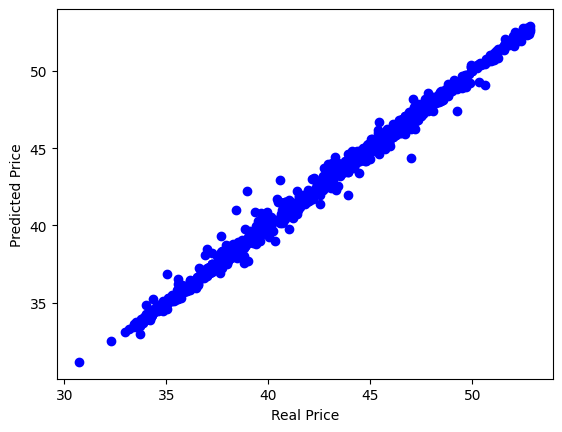

Root mean squared error: 0.37
Coefficient of determination: 0.99


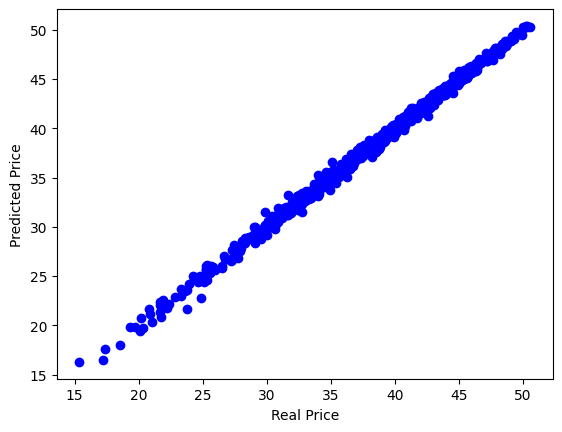

Root mean squared error: 0.34
Coefficient of determination: 1.00


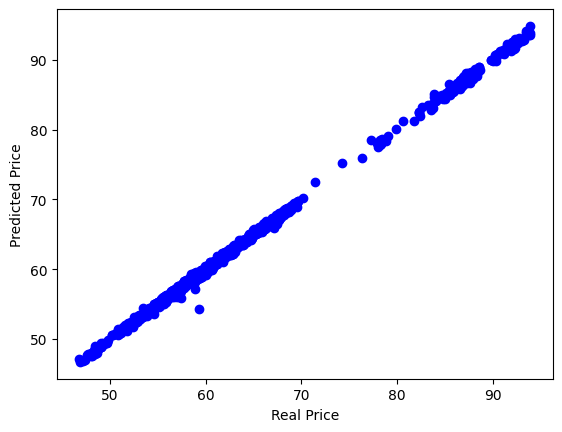

Root mean squared error: 0.34
Coefficient of determination: 1.00


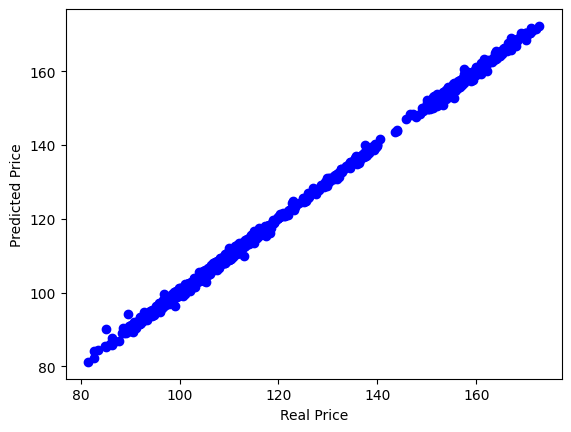

Root mean squared error: 0.71
Coefficient of determination: 1.00


In [94]:
linear_reg = LinearRegression(fit_intercept=False)
# training model using 5 Fold Cross Validation
kf = KFold(n_splits=5)

errors = []

#  Split the features (X) and target (y) into train and test sets
for idx, (train, test) in enumerate(kf.split(X)):
    X_train = X.values[train]
    X_test = X.values[test]

    y_train = y.values[train]
    y_test = y.values[test]

    # Fit the linear regression model to the train set
    model = linear_reg.fit(X_train,y_train)
    # Predict the target values for the test set
    y_pred_test = model.predict(X_test)
    # Predict the target values for the train set
    y_pred_train = model.predict(X_train)

    # Compute the root mean squared error (RMSE) for the test set
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    # Compute the root mean squared error (RMSE) for the train set
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))

    #Compute the coefficient of determination (R^2) for the test set
    r2_test = r2_score(y_test, y_pred_test)
    # Compute the coefficient of determination (R^2) for the train set
    r2_train = r2_score(y_train, y_pred_train)

    #Plot the scatter plot of real price vs predicted price for the test set
    plt.scatter(y_test, y_pred_test, color='b')
    plt.xlabel('Real Price')
    plt.ylabel('Predicted Price')
    plt.show()

    # Print the root mean squared error (RMSE) for the test set
    print("Root mean squared error: %.2f" % rmse_test)
    # Print the coefficient of determination (R^2) for the test set
    print("Coefficient of determination: %.2f" % r2_test)

    # Create a list of error metrics
    error = {'kfold': idx+1,
             'rmse_train': rmse_train,
             'r2_train': r2_train,
             'rmse_test': rmse_test,
             'r2_test': r2_test
            }
    # Append the error metrics to the list of errors
    errors.append(error)

In [95]:
# Convert the list of error dictionaries into a pandas DataFrame
errors = pd.DataFrame(errors)
errors

,kfold,rmse_train,r2_train,rmse_test,r2_test
0,1,0.463498,0.999824,0.419314,0.998157
1,2,0.474190,0.999825,0.367905,0.994736
2,3,0.478885,0.999816,0.344239,0.996653
3,4,0.479247,0.999832,0.341486,0.999106
4,5,0.366901,0.999283,0.711959,0.999010


In [96]:
# Precision of the model
errors[['rmse_test','r2_test']].mean()


rmse_test    0.436981
r2_test      0.997532
dtype: float64

## **Polynomial Regression**

In [97]:
new_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,49.833332,50.250000,48.083332,48.583332,24.406229,12019200
1,2000-01-04,47.083332,47.458332,46.125000,47.250000,23.870722,11723400
2,2000-01-05,46.833332,48.375000,46.000000,46.958332,23.723370,8714550
3,2000-01-06,46.750000,48.625000,46.500000,47.625000,24.060169,8369250
4,2000-01-07,48.416668,49.000000,47.333332,48.500000,24.502222,6571950
...,...,...,...,...,...,...,...
5530,2021-12-23,157.610001,159.119995,157.210007,157.259995,150.152054,8055200
5531,2021-12-27,157.600006,158.199997,156.339996,158.160004,151.011383,6188100
5532,2021-12-28,158.199997,160.149994,158.080002,158.639999,151.469666,6342300
5533,2021-12-29,158.850006,159.630005,158.149994,158.559998,151.393280,6398900


In [98]:
Xcols = new_data.columns[new_data.columns.str.contains("C.") | new_data.columns.str.contains("L")| new_data.columns.str.contains("A.")|new_data.columns.str.contains("H")|new_data.columns.str.contains("L")|new_data.columns.str.contains("V")]
X = new_data[Xcols]
X

,High,Low,Close,Adj Close,Volume
0,50.250000,48.083332,48.583332,24.406229,12019200
1,47.458332,46.125000,47.250000,23.870722,11723400
2,48.375000,46.000000,46.958332,23.723370,8714550
3,48.625000,46.500000,47.625000,24.060169,8369250
4,49.000000,47.333332,48.500000,24.502222,6571950
...,...,...,...,...,...
5530,159.119995,157.210007,157.259995,150.152054,8055200
5531,158.199997,156.339996,158.160004,151.011383,6188100
5532,160.149994,158.080002,158.639999,151.469666,6342300
5533,159.630005,158.149994,158.559998,151.393280,6398900


**Regularization with coefficient optimization**

In [99]:
# Defining a list of alpha values to find the optimal value
a_val = [0.000001, 0.001, 0.05, 5]
hyper_parameter = {'alpha':a_val}

# Create a Ridge regression model
linear_reg_ridge = Ridge()
# Create a GridSearchCV object for hyperparameter tuning
clf = GridSearchCV(linear_reg_ridge, hyper_parameter, cv=5, scoring='neg_mean_squared_error')

# Fit the model on the data to perform hyperparameter tuning
_ = clf.fit(X,y)

# Extract the root mean squared error (RMSE) from the grid search results
rmse_list = np.sqrt(clf.cv_results_['mean_test_score']*-1)
rmse_list



array([0.45868024, 0.45868021, 0.45867876, 0.45854805])

Text(0, 0.5, 'RMSE')

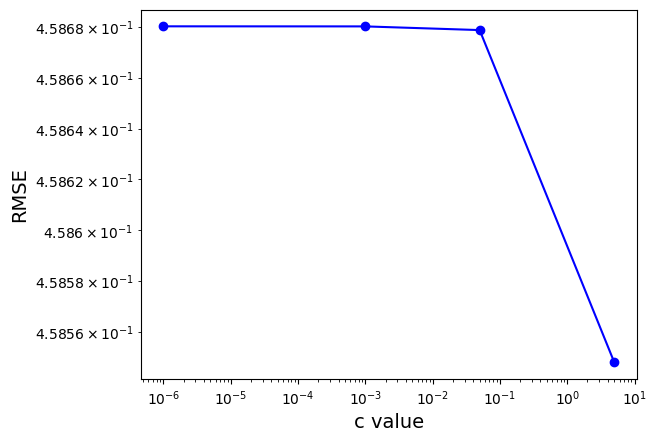

In [100]:
# Plotting all c values
plt.plot(a_val, rmse_list, '-bo')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('c value', fontsize=14)
plt.ylabel('RMSE', fontsize=14)

In [101]:
# Finding min c value and rmse
min_idx = np.argmin(rmse_list)

a_val[min_idx], rmse_list[min_idx]

(5, 0.45854805188408454)

In [102]:
# optimal value
a_opt = a_val[min_idx]
a_opt

5

**Training the model with optimal value**

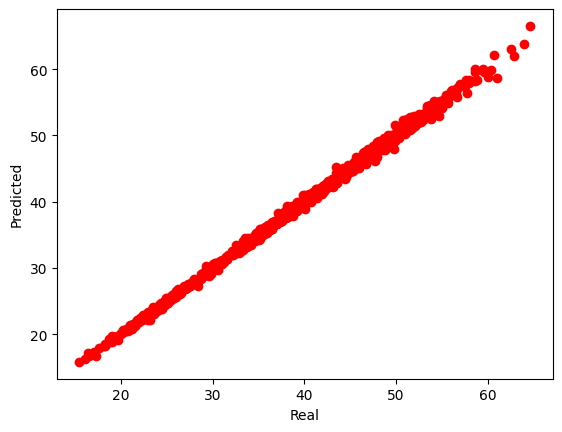

Root Mean squared error: 0.42
Coefficient of determination: 1.00


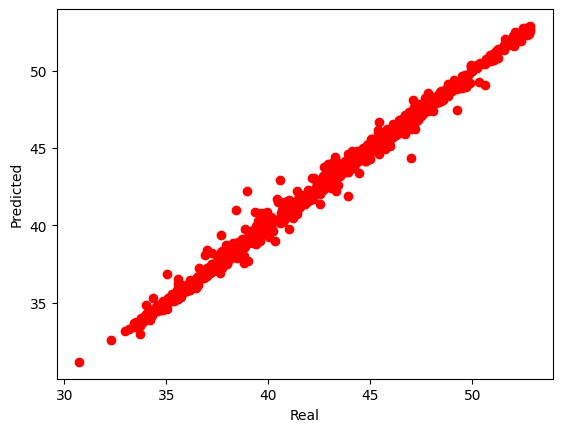

Root Mean squared error: 0.37
Coefficient of determination: 0.99


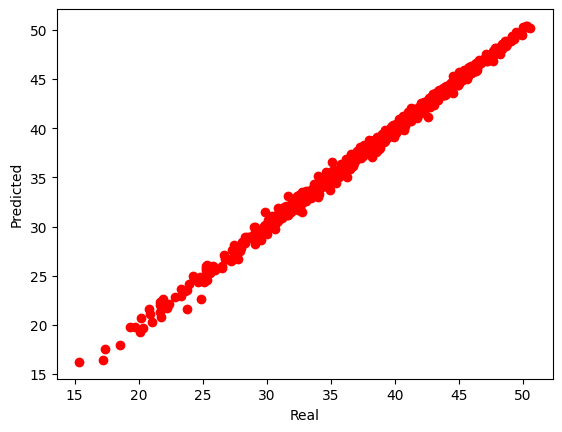

Root Mean squared error: 0.35
Coefficient of determination: 1.00


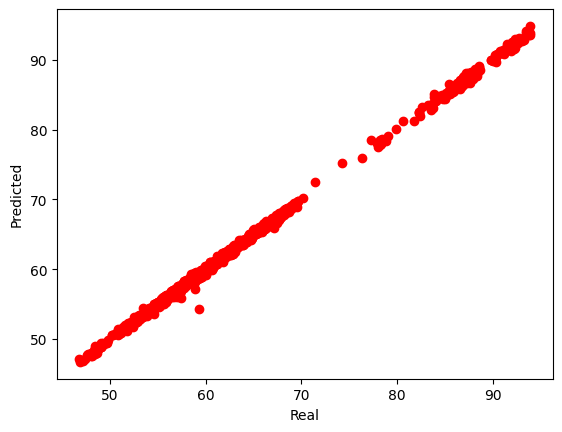

Root Mean squared error: 0.34
Coefficient of determination: 1.00


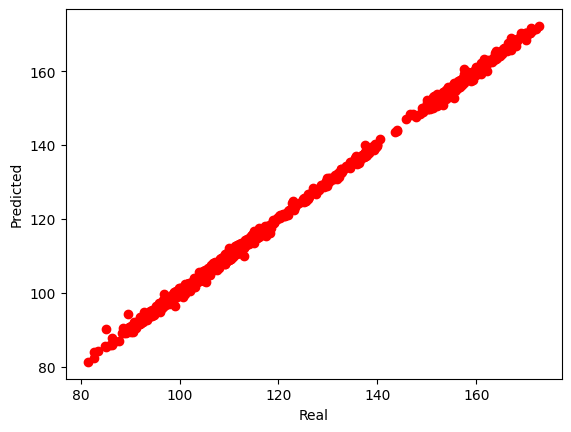

Root Mean squared error: 0.71
Coefficient of determination: 1.00


In [103]:
# Create a Ridge regression model with the optimized alpha value
pr_ridge_a_opt = Ridge(alpha=a_opt)

# Initialize an empty list to store the errors
errors_a_opt = []

# Loop through each fold of the cross-validation
for idx, (train, test) in enumerate(kf.split(X)):

# Split the data into training and testing sets based on the fold indices
    X_train = X.values[train]
    X_test = X.values[test]

    y_train = y.values[train]
    y_test = y.values[test]

# Fit the Ridge regression model on the training data
    model = pr_ridge_a_opt.fit(X_train,y_train)

# Make predictions on the testing and training data
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
# Compute the errors
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))

    r2_test = r2_score(y_test, y_pred_test)
    r2_train = r2_score(y_train, y_pred_train)

    #Plot pred vs real
    plt.scatter(y_test, y_pred_test, color='r')
    plt.xlabel('Real')
    plt.ylabel('Predicted')
    plt.show()

# Print the root mean squared error (RMSE) for the test set
    print("Root Mean squared error: %.2f" % rmse_test)
# Print the coefficient of determination (R^2) for the test set
    print("Coefficient of determination: %.2f" % r2_test)

# Create a list of error metrics
    error = {'kfold': idx+1,
             'rmse_train': rmse_train,
             'rmse_test': rmse_test,
             'r2_test': r2_test,
             'r2_train': r2_train}

errors_a_opt.append(error)
errors_a_opt = pd.DataFrame(errors_a_opt)

In [104]:
# Final rmse and r2 values(mean)
errors_a_opt[['rmse_test','r2_test']].mean()

rmse_test    0.709561
r2_test      0.999016
dtype: float64

# **Comparing Linear and Polynomial regression**

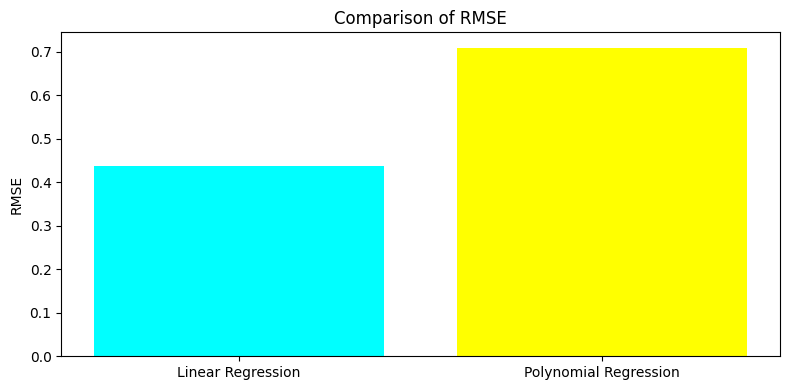

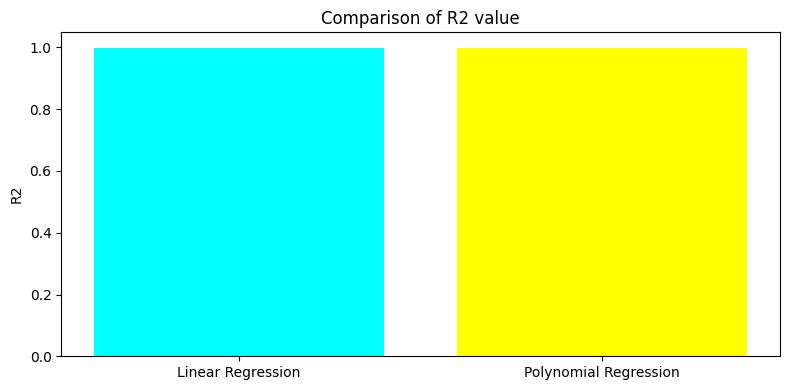

In [105]:
# List of error values
RMSE_Error = (0.436981,0.709561)
R2_Error = (0.997532,0.999016)

# Model namesfor the x axix labels
models = ['Linear Regression', 'Polynomial Regression']

# Colors for the bars
colors =['cyan', 'yellow']

grid = (1, 2)


# Plotting for rmse
plt.figure(figsize=(8, 4))
plt.bar(models, RMSE_Error, color= colors)
plt.ylabel('RMSE')
plt.title('Comparison of RMSE')
plt.tight_layout()
plt.show()


# Plotting for r2
plt.figure(figsize=(8, 4))
plt.bar(models, R2_Error, color= colors)
plt.ylabel('R2')
plt.title('Comparison of R2 value')

plt.tight_layout()
plt.show()

# **RF**

In [107]:
X = data[['High', 'Low', 'Close', 'Adj Close', 'Volume']]
X


,High,Low,Close,Adj Close,Volume
0,50.250000,48.083332,48.583332,24.406229,12019200
1,47.458332,46.125000,47.250000,23.870722,11723400
2,48.375000,46.000000,46.958332,23.723370,8714550
3,48.625000,46.500000,47.625000,24.060169,8369250
4,49.000000,47.333332,48.500000,24.502222,6571950
...,...,...,...,...,...
5530,159.119995,157.210007,157.259995,150.152054,8055200
5531,158.199997,156.339996,158.160004,151.011383,6188100
5532,160.149994,158.080002,158.639999,151.469666,6342300
5533,159.630005,158.149994,158.559998,151.393280,6398900


In [108]:
y = data['Open']
y

0        49.833332
1        47.083332
2        46.833332
3        46.750000
4        48.416668
           ...    
5530    157.610001
5531    157.600006
5532    158.199997
5533    158.850006
5534    159.110001
Name: Open, Length: 5535, dtype: float64

In [119]:
# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data normalization
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': list(range(100, 200, 10)),  # Number of trees in the forest
    'max_depth': [None, 5, 10],       # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]     # Minimum number of samples required to be at a leaf node
}

# Perform 5-fold cross-validation with grid search
kf = KFold(n_splits=5, random_state=42, shuffle=True)
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

 # Loop over different values of n_estimators
for n_estimators in param_grid['n_estimators']:
# Create the Random Forest regressor
    rf = RandomForestRegressor(n_estimators=n_estimators, random_state=42)


# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='r2', cv=5)
grid_search.fit(X_train, y_train)

# Get the best model with the tuned hyperparameters
best_rf = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_rf.predict(X_test)

# Evaluate the model performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f'R2 Score: {r2}')
print(f'RMSE: {rmse}')

# Print the best hyperparameters
print(f'Best Hyperparameters: {grid_search.best_params_}')

R2 Score: 0.9996936930565883
RMSE: 0.5929803341778568
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 190}


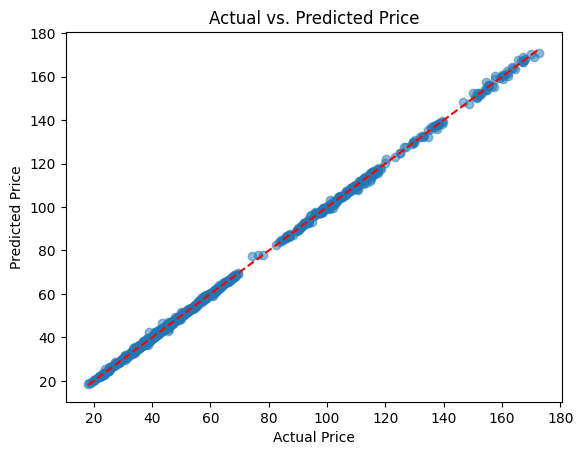

In [110]:
#for overall dataset
y_pred = best_rf.predict(X)
# Plot the predicted values against the actual values
plt.scatter(y, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Price')
plt.show()

# **Test Case**



In [126]:
model1 = linear_reg.fit(X,y)
pr = Ridge(alpha = a_opt)
model2 = pr.fit(X,y)
model3 = best_rf.fit(X,y)

In [127]:
test_data = pd.read_csv('/content/drive/MyDrive/JPMorgan_testDATA [MConverter.eu].csv')
test_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,159.860001,162.639999,159.509995,161.699997,154.391357,13120900
1,2022-01-04,164.309998,168.580002,164.229996,167.830002,160.244293,20195800
2,2022-01-05,167.820007,168.360001,163.729996,163.779999,157.314697,17539400
3,2022-01-06,166.910004,167.369995,163.869995,165.520004,158.986023,14047500
4,2022-01-07,165.669998,167.529999,165.059998,167.160004,160.561249,13913300
...,...,...,...,...,...,...,...
246,2022-12-23,130.580002,131.440002,129.639999,131.279999,129.302628,5091900
247,2022-12-27,131.570007,132.220001,130.550003,131.740005,129.755707,5411000
248,2022-12-28,131.850006,133.410004,131.009995,132.460007,130.464859,8827700
249,2022-12-29,132.929993,133.270004,132.309998,133.220001,131.213409,6585200


In [122]:
Xcols = data.columns[data.columns.str.contains("High")| data.columns.str.contains("Low")|data.columns.str.contains("Close")|data.columns.str.contains("Adj")|data.columns.str.contains("Volume")]
X = data[Xcols]
X

,High,Low,Close,Adj Close,Volume
0,50.250000,48.083332,48.583332,24.406229,12019200
1,47.458332,46.125000,47.250000,23.870722,11723400
2,48.375000,46.000000,46.958332,23.723370,8714550
3,48.625000,46.500000,47.625000,24.060169,8369250
4,49.000000,47.333332,48.500000,24.502222,6571950
...,...,...,...,...,...
5530,159.119995,157.210007,157.259995,150.152054,8055200
5531,158.199997,156.339996,158.160004,151.011383,6188100
5532,160.149994,158.080002,158.639999,151.469666,6342300
5533,159.630005,158.149994,158.559998,151.393280,6398900


In [123]:
y = data.Open
y

0        49.833332
1        47.083332
2        46.833332
3        46.750000
4        48.416668
           ...    
5530    157.610001
5531    157.600006
5532    158.199997
5533    158.850006
5534    159.110001
Name: Open, Length: 5535, dtype: float64

In [128]:
y_pred1 = model1.predict(X) #linear
y_pred2 = model2.predict(X) #polynomial
y_pred3 = model3.predict(X) #Random forest
# Errors
rmse_test1 = np.sqrt(mean_squared_error(y, y_pred1))
rmse_test2 = np.sqrt(mean_squared_error(y, y_pred2))
rmse_test3 = np.sqrt(mean_squared_error(y, y_pred3))

r2_test1 = r2_score(y, y_pred1)
r2_test2 = r2_score(y, y_pred2)
r2_test3 = r2_score(y, y_pred3)

errors = {'rmse_test1': rmse_test1,'rmse_test2': rmse_test2, 'rmse_test3': rmse_test3, 'r2_test1':r2_test1, 'r2_test2':r2_test2, 'r2_test3': r2_test3}
print(errors)

{'rmse_test1': 0.4547998894090471, 'rmse_test2': 0.4547096331426836, 'rmse_test3': 0.20637362012801452, 'r2_test1': 0.9998156025286628, 'r2_test2': 0.9998156757097529, 'r2_test3': 0.9999620315712268}


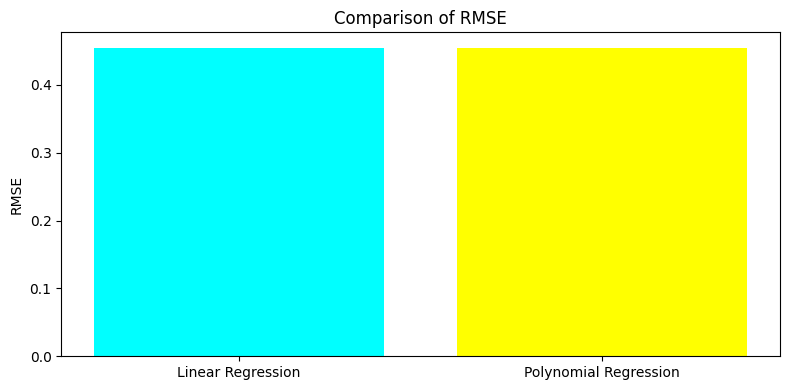

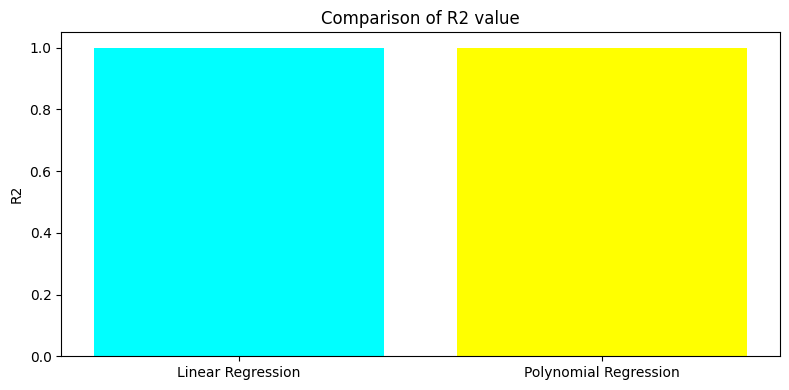

In [125]:
# List of error values
RMSE_Error = (0.4547998894090471,0.4547096331426836)
R2_Error = (0.9998156025286628,0.9998156757097529)

# Model namesfor the x axix labels
models = ['Linear Regression', 'Polynomial Regression']

# Colors for the bars
colors =['cyan', 'yellow']

grid = (1, 2)


# Plotting for rmse
plt.figure(figsize=(8, 4))
plt.bar(models, RMSE_Error, color= colors)
plt.ylabel('RMSE')
plt.title('Comparison of RMSE')
plt.tight_layout()
plt.show()


# Plotting for r2
plt.figure(figsize=(8, 4))
plt.bar(models, R2_Error, color= colors)
plt.ylabel('R2')
plt.title('Comparison of R2 value')

plt.tight_layout()
plt.show()